## Aula 2

In [1]:
import pandas as pd
fonte = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'
dados = pd.read_csv(fonte)

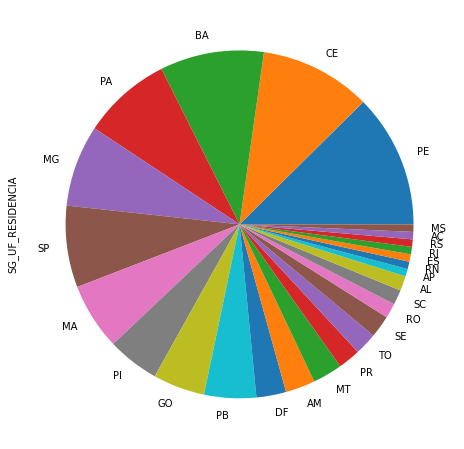

In [2]:
#alunos com idade menor ou igual a 14
alunos_menor_14 = dados.query('NU_IDADE <= 14')

#obtendo a proporção por estado e gerando um gráfico
alunos_menor_14['SG_UF_RESIDENCIA'].value_counts(normalize=True).plot.pie(figsize=(10,8))

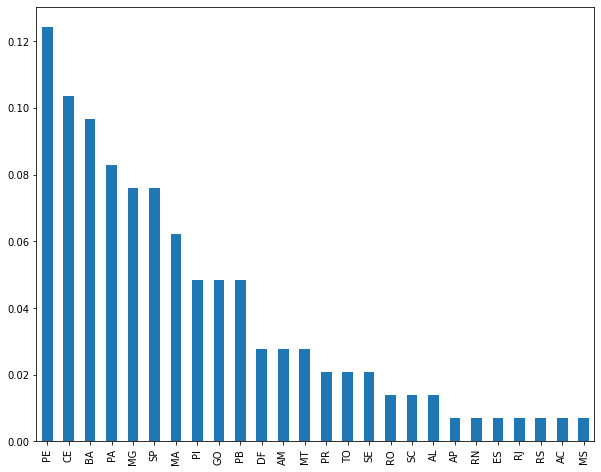

In [3]:
#note que esse gráfico não ficou muito legível, vamos tentar outro tipo
alunos_menor_14['SG_UF_RESIDENCIA'].value_counts(normalize=True).plot.bar(figsize=(10,8))

In [4]:
#vamos começar a utilizar as visualizações da biblioteca Seaborn
import seaborn as sns

In [5]:
#fazendo uma breve análise do questionário sócio-econômico, vamos olhar a questão sobre renda

renda = dados['Q006'].unique()
renda.sort()
print(renda)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q']


Text(0.5, 1.0, 'Boxplot das notas de matemática pela renda')

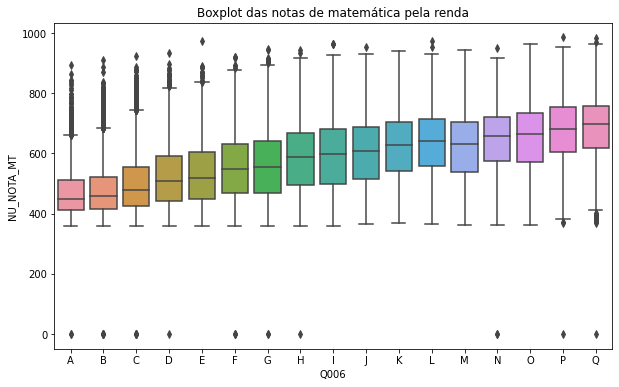

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x = 'Q006', y = 'NU_NOTA_MT', data = dados, order = renda)
plt.title('Boxplot das notas de matemática pela renda')

In [7]:
#Observamos que as notas aumentam a medida que a renda dos alunos aumenta

#esse comportamento é apenas para matemática, mas e se quisermos ver as notas de todas as provas?

#lista com todas as notas:
provas = ['NU_NOTA_REDACAO', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH']

In [8]:
#soma de todas as notas de cada inscrito
dados[provas].sum(axis=1)

0         2288.9
1         1184.6
2         2350.5
3         2555.7
4         2803.5
           ...  
127375    2867.4
127376    2218.5
127377    1453.9
127378    2573.9
127379    2287.8
Length: 127380, dtype: float64

In [9]:
#adicionando esta coluna no dataframe
dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis=1)

Text(0.5, 1.0, 'Boxplot das notas totais pela renda')

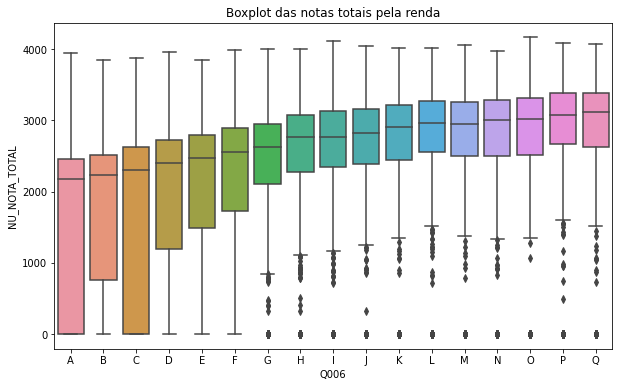

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'Q006', y = 'NU_NOTA_TOTAL', data = dados, order = renda)
plt.title('Boxplot das notas totais pela renda')

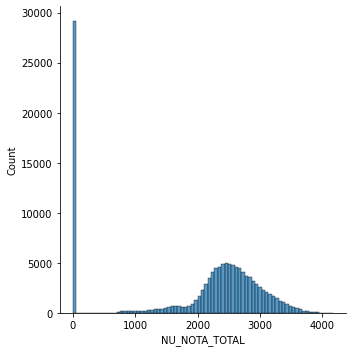

In [11]:
#fazendo um histograma:
sns.displot(dados, x = 'NU_NOTA_TOTAL')

In [12]:
#vamos olhar com mais atenção para os inscritos que tiraram 0
dados.query('NU_NOTA_TOTAL == 0').head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
10,190001005028,2019,1506807,Santarém,15,PA,28,F,2,3,1,1506807.0,Santarém,15.0,PA,1,9,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,B,A,B,2,B,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,B,A,A,A,0.0
11,190001005057,2019,1501709,Bragança,15,PA,36,F,1,3,1,1501709.0,Bragança,15.0,PA,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,A,A,4,B,A,B,D,A,A,B,A,A,A,A,A,A,B,B,A,B,A,A,B,0.0
26,190001005484,2019,1504208,Marabá,15,PA,26,M,2,3,1,1721208.0,Tocantinópolis,17.0,TO,1,8,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,B,C,C,2,C,A,B,B,A,A,B,A,A,A,B,A,A,B,A,A,C,A,B,B,0.0
38,190001006086,2019,1508126,Ulianópolis,15,PA,29,F,1,3,1,2108108.0,Paulo Ramos,21.0,MA,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,A,5,C,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,C,A,A,B,0.0
40,190001006292,2019,1504422,Marituba,15,PA,24,M,1,1,1,1504422.0,Marituba,15.0,PA,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,F,B,6,G,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,D,A,A,B,0.0


In [13]:
provas.append('NU_NOTA_TOTAL')
dados[provas].query('NU_NOTA_TOTAL == 0')

,NU_NOTA_REDACAO,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0


In [14]:
dados_sem_nota_0 = dados.query('NU_NOTA_TOTAL != 0')
dados_sem_nota_0.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Boxplot das notas totais pela renda')

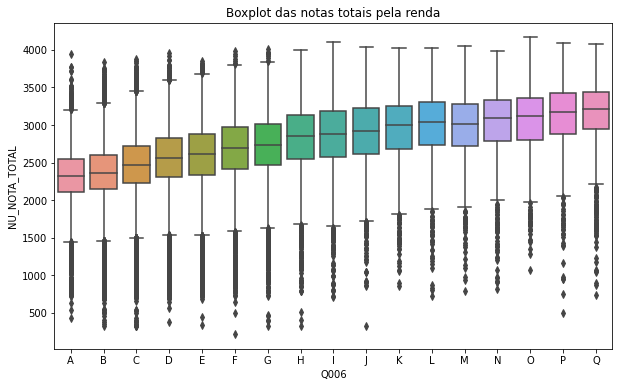

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'Q006', y = 'NU_NOTA_TOTAL', data = dados_sem_nota_0, order = renda)
plt.title('Boxplot das notas totais pela renda')

Text(0.5, 1.0, 'Boxplot das notas totais pela renda')

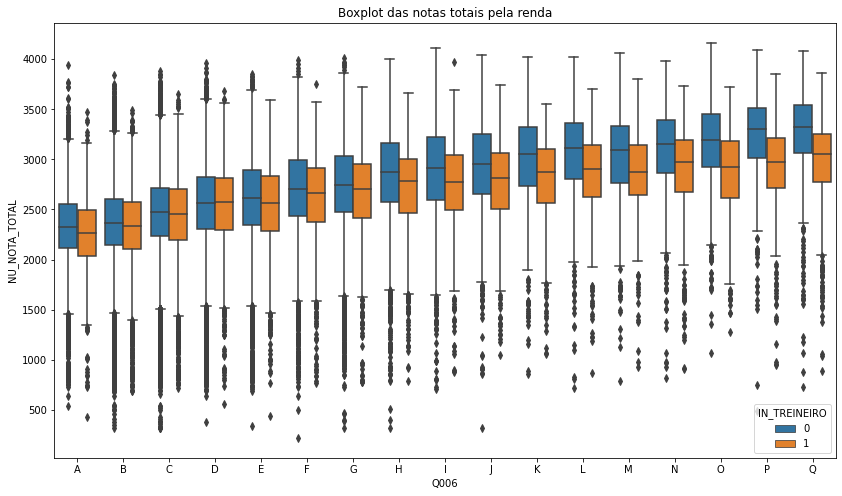

In [16]:
plt.figure(figsize=(14,8))
sns.boxplot(x = 'Q006', y = 'NU_NOTA_TOTAL', data = dados_sem_nota_0, 
            hue = 'IN_TREINEIRO', order = renda)
plt.title('Boxplot das notas totais pela renda')

### Desafios

Desafio 1: criar uma função para fazer esses gráficos, mudando apenas os argumentos de nota

Desafio 2: Verificar se os alunos que zeraram foram eliminados ou não compareceram

Desafio 3: Ver se quem faltou a prova fez a prova na mesma cidade que mora

Desafio 4: Verificar a quantidade de treineiros e não treineiros por renda

Desafio 5: Fazer o boxplot considerando o acesso a internet



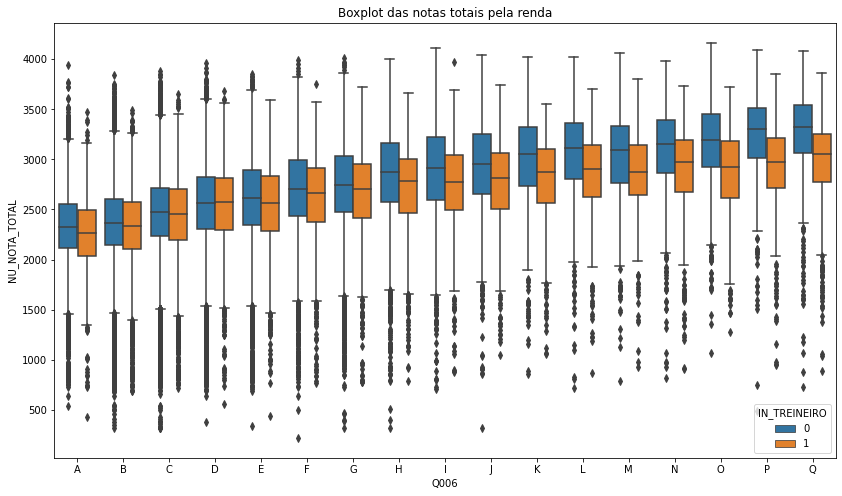

In [17]:
#desafio 1:

def graf_function(linha, coluna, df, titulo, **kwargs):
  plt.figure(figsize=(14,8))
  sns.boxplot(x = linha, y = coluna, data = df, **kwargs)
  plt.title(titulo)

graf_function('Q006', 'NU_NOTA_TOTAL', dados_sem_nota_0, 'Boxplot das notas totais pela renda',hue = 'IN_TREINEIRO', order = renda)


In [18]:
#desafio 2:

presenca = ['TP_PRESENCA_CN', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'TP_PRESENCA_CH']
#0: faltou
#1: presente
#2: eliminado

dados.query('NU_NOTA_TOTAL == 0')[presenca].value_counts()

#vemos que a maioria dos alunos que tiraram 0, faltou ou foi eliminada, porém alguns estavam presentes e tiraram 0

TP_PRESENCA_CN  TP_PRESENCA_LC  TP_PRESENCA_MT  TP_PRESENCA_CH
0               0               0               0                 28998
                2               0               2                   120
                1               0               1                    39
1               0               1               0                     3
                1               1               1                     2
dtype: int64

In [19]:
#e quem falta ou é eliminado recebe NaN
dados.query("TP_PRESENCA_CN == 0" or "TP_PRESENCA_CN == 2")["NU_NOTA_CN"]

1        NaN
10       NaN
11       NaN
26       NaN
38       NaN
          ..
127366   NaN
127368   NaN
127369   NaN
127374   NaN
127377   NaN
Name: NU_NOTA_CN, Length: 34570, dtype: float64

In [58]:
#desafio 3: 

#candidatos que fizeram a prova em um município diferente da residência:
dados.query('NO_MUNICIPIO_RESIDENCIA != NO_MUNICIPIO_PROVA').value_counts()

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA  NO_MUNICIPIO_RESIDENCIA  CO_UF_RESIDENCIA  SG_UF_RESIDENCIA  NU_IDADE  TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  CO_MUNICIPIO_NASCIMENTO  NO_MUNICIPIO_NASCIMENTO  CO_UF_NASCIMENTO  SG_UF_NASCIMENTO  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  CO_ESCOLA   CO_MUNICIPIO_ESC  NO_MUNICIPIO_ESC      CO_UF_ESC  SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  IN_BAIXA_VISAO  IN_CEGUEIRA  IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  IN_SURDO_CEGUEIRA  IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  IN_DEFICIT_ATENCAO  IN_DISLEXIA  IN_DISCALCULIA  IN_AUTISMO  IN_VISAO_MONOCULAR  IN_OUTRA_DEF  IN_GESTANTE  IN_LACTANTE  IN_IDOSO  IN_ESTUDA_CLASSE_HOSPITALAR  IN_SEM_RECURSO  IN_BRAILLE  IN_AMPLIADA_24  IN_AMPLIADA_18  IN_LEDOR  IN_ACESSO  IN_TRANSCRICAO  IN_LIBRAS  IN_TEMPO_ADICIONAL  IN_LEITURA_LABIAL  IN_MESA_CADEIRA_RODAS  IN_MESA_CADEIRA_SEPARADA  IN_APOIO_PERNA  IN_GUIA_INTERPRETE  IN_COMPUTADO

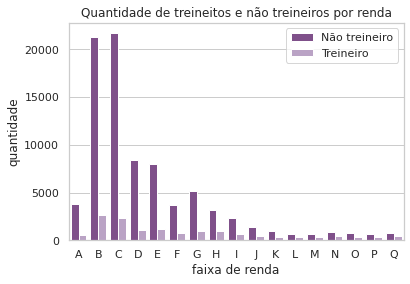

In [44]:
#desafio 4:

#0: não treineiro
#1: treineiro

sns.set_palette('PRGn')
sns.set_style('whitegrid')
g = sns.countplot(x = 'Q006', data = dados_sem_nota_0, hue = 'IN_TREINEIRO', order = renda)
g.set_title('Quantidade de treineitos e não treineiros por renda')
g.set(xlabel='faixa de renda', ylabel='quantidade')
g.legend(['Não treineiro', 'Treineiro'])


Text(0, 0.5, 'Nota total')

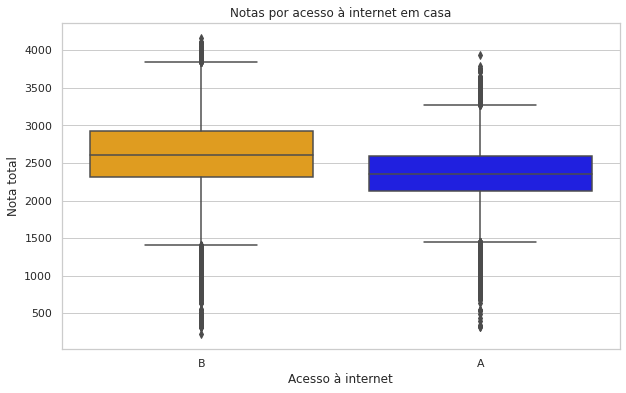

In [53]:
#Desafio 5:

#Acesso a internet: não (A), sim (B)

plt.figure(figsize=(10,6))
sns.boxplot(x = 'Q025', y = 'NU_NOTA_TOTAL', data = dados_sem_nota_0)
plt.title('Notas por acesso à internet em casa')
plt.xlabel('Acesso à internet')
plt.ylabel('Nota total')
